### **COMPUTER VISION - ASSIGNMENT 3**
SADWI KANDULA

Epoch: 0 Loss: 24.823241336727587
Epoch: 10 Loss: 1.4605543590282277


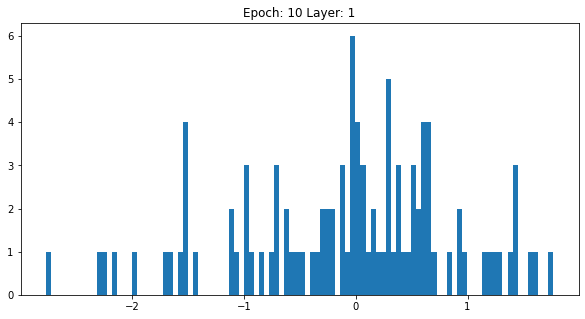

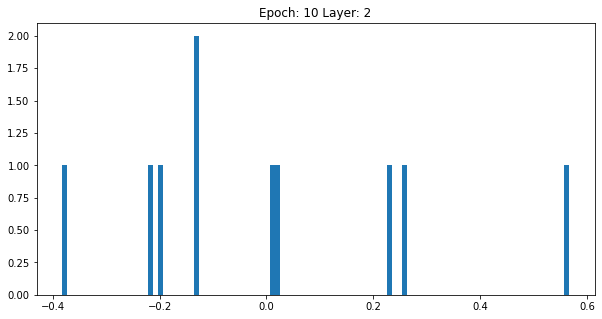

Epoch: 20 Loss: 1.1397810926579555


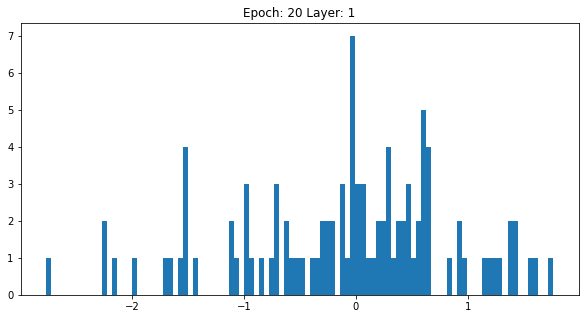

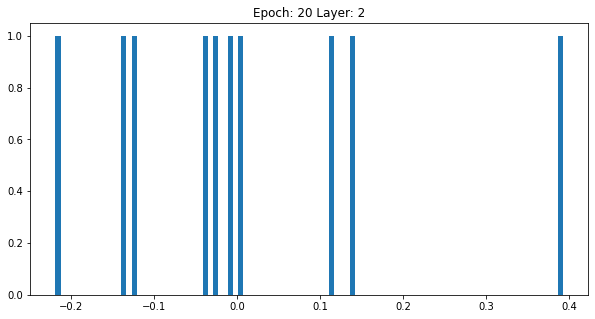

Epoch: 30 Loss: 1.0535621623095575
Epoch: 40 Loss: 1.0216525293083436
Epoch: 50 Loss: 1.0080593646514024


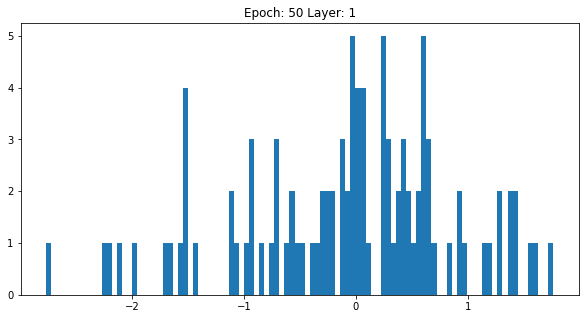

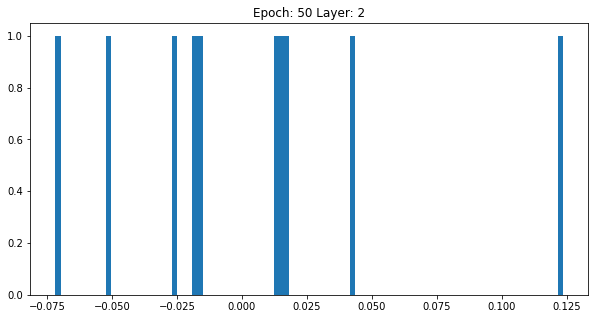

Epoch: 60 Loss: 1.0017477428758752
Epoch: 70 Loss: 0.9986529134555323
Epoch: 80 Loss: 0.9970669926383796


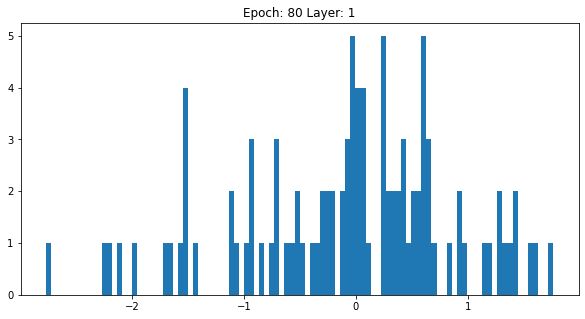

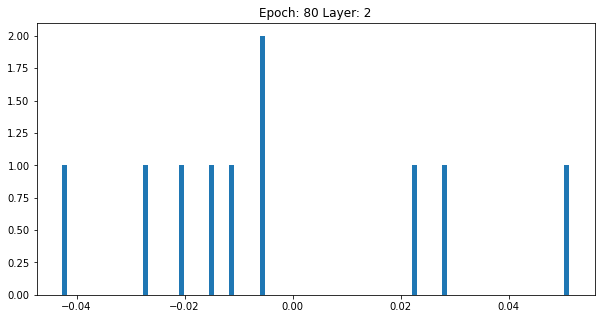

Epoch: 90 Loss: 0.9962126099079648


In [56]:
import numpy as np

# activation function
def relu(x):
    return np.maximum(0, x)

# derivative of relu function
def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# initialize weights and biases randomly
def initialize_weights_and_biases(input_units, hidden_units, output_units):
    weights_1 = np.random.randn(input_units, hidden_units)
    biases_1 = np.zeros((1, hidden_units))
    weights_2 = np.random.randn(hidden_units, output_units)
    biases_2 = np.zeros((1, output_units))
    
    return weights_1, biases_1, weights_2, biases_2

# feed forward
def forward(X, weights_1, biases_1, weights_2, biases_2):
    hidden_layer = relu(np.dot(X, weights_1) + biases_1)
    output_layer = np.dot(hidden_layer, weights_2) + biases_2
    
    return hidden_layer, output_layer

# backpropagation
def backpropagation(X, y, hidden_layer, output_layer, weights_1, weights_2):
    m = X.shape[0]
    
    d_output = output_layer - y
    d_weights_2 = np.dot(hidden_layer.T, d_output) / m
    d_biases_2 = np.sum(d_output, axis=0, keepdims=True) / m
    
    d_hidden = np.dot(d_output, weights_2.T) * relu_derivative(hidden_layer)
    d_weights_1 = np.dot(X.T, d_hidden) / m
    d_biases_1 = np.sum(d_hidden, axis=0, keepdims=True) / m
    
    return d_weights_1, d_biases_1, d_weights_2, d_biases_2

# update weights and biases
def update_weights_and_biases(weights_1, biases_1, weights_2, biases_2, d_weights_1, d_biases_1, d_weights_2, d_biases_2, learning_rate=0.1):
    weights_1 -= learning_rate * d_weights_1
    biases_1 -= learning_rate * d_biases_1
    weights_2 -= learning_rate * d_weights_2
    biases_2 -= learning_rate * d_biases_2
    
    return weights_1, biases_1, weights_2, biases_2

# calculate mean squared error
def mean_squared_error(y_pred, y_true):
    m = y_true.shape[0]
    error = np.sum((y_pred - y_true) ** 2) / m
    
    return error

# train the neural network
def train(X, y, input_units, hidden_units, output_units, epochs, learning_rate):
    losses = []
    weights_1, biases_1, weights_2, biases_2 = initialize_weights_and_biases(input_units, hidden_units, output_units)
    for i in range(epochs):
      hidden_layer, output_layer = forward(X, weights_1, biases_1, weights_2, biases_2)
      loss = mean_squared_error(output_layer, y)
      losses.append(loss)
    
      d_weights_1, d_biases_1, d_weights_2, d_biases_2 = backpropagation(X, y, hidden_layer, output_layer, weights_1, weights_2)
      weights_1, biases_1, weights_2, biases_2 = update_weights_and_biases(weights_1, biases_1, weights_2, biases_2, d_weights_1, d_biases_1, d_weights_2, d_biases_2, learning_rate)
    
    # plot the training loss every 10 epochs
      if i % 10 == 0:
          print("Epoch:", i, "Loss:", loss)
    
    # plot the distribution of weights every 10 epochs
      if i in [10, 20, 50, 80, 100]:
          weights = [weights_1, weights_2]
          plot_weights_distribution(weights, i)
        
    return losses, weights_1, biases_1, weights_2, biases_2


def plot_weights_distribution(weights, epoch):
    for i, w in enumerate(weights):
      plt.figure(figsize=(10, 5))
      plt.hist(w.flatten(), bins=100)
      plt.title("Epoch: " + str(epoch) + " Layer: " + str(i+1))
      plt.show()  

X = np.random.randn(1000, 10)
y = np.random.randn(1000, 1)


hidden_units = 10
hidden_layers = 1
output_units = 1

epochs = 100
learning_rate = 0.1

losses, weights_1, biases_1, weights_2, biases_2 = train(X, y, input_units=X.shape[1], hidden_units=hidden_units, output_units=output_units, epochs=epochs, learning_rate=learning_rate)




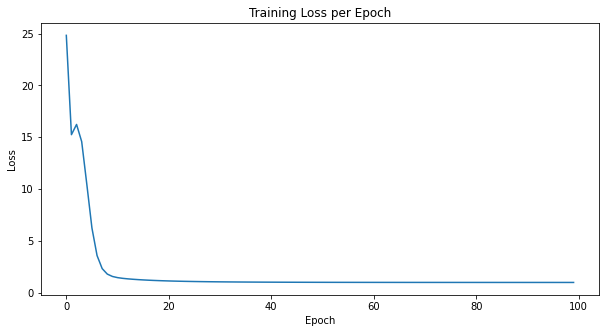

In [57]:
plt.figure(figsize=(10, 5))
plt.plot(losses)
plt.title("Training Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [62]:
# function to plot the distribution of weights
def plot_weights_distribution(weights, epoch):
    for i, w in enumerate(weights):
        plt.figure(figsize=(10, 5))
        plt.hist(w.flatten(), bins=100)
        plt.title("Epoch: " + str(epoch) + " Layer: " + str(i+1))
        plt.show()

# plot the distribution of weights every 10 epochs
if i in [10, 20, 50, 80, 100]:
    weights = [weights_1, weights_2]
    plot_weights_distribution(weights, i)
plt.show()

